In [1]:
#Importing the library
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#reading the dataset 1
ds1 = pd.read_csv('Desktop/train.csv')

In [3]:
ds1

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
#reading the dataset 2
ds2= pd.read_csv('Desktop/WELFake_Dataset.csv')

In [5]:
ds2

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [6]:
ds1.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
ds2.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
ds2= ds2[0:20800]

In [9]:
ds2

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
20795,20795,Clinton ‘appalled’ by effort to recoup veteran...,‹ › Arnaldo Rodgers is a trained and educated ...,1
20796,20796,27 Photos That Prove The Earth Is in Serious D...,We Are Change \nOften times we are blind to wh...,1
20797,20797,"In Trump Era, Censorship May Start in the News...",This is how the muzzling starts: not with a bo...,0
20798,20798,HILLARY APPROVED? BILL CLINTON Ditched Secret ...,We all know Bill Clinton is a sexual predator....,1


# Pre-processing of the data

In [10]:
# shape of the dataset

ds1.shape

(20800, 5)

In [11]:
ds2.shape

(20800, 4)

In [12]:
# checking for missing values

ds1.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
#cheking for the missing values in other dataset

ds2.isnull().sum()

Unnamed: 0      0
title         125
text           11
label           0
dtype: int64

In [14]:
# replacing null values with empty string

ds1= ds1.fillna("")

In [15]:
ds1

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [16]:
ds2= ds2.fillna("")
ds2

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
20795,20795,Clinton ‘appalled’ by effort to recoup veteran...,‹ › Arnaldo Rodgers is a trained and educated ...,1
20796,20796,27 Photos That Prove The Earth Is in Serious D...,We Are Change \nOften times we are blind to wh...,1
20797,20797,"In Trump Era, Censorship May Start in the News...",This is how the muzzling starts: not with a bo...,0
20798,20798,HILLARY APPROVED? BILL CLINTON Ditched Secret ...,We all know Bill Clinton is a sexual predator....,1


In [17]:
ds1= ds1.fillna('')
ds1

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [18]:
# combine text and title so that it will be easy to understand what title has caused the reason fake and by which author it caused
ds1['content'] = ds1['title'] + ' ' + ds1['text']
ds1['content']


0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Why the Trut...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive   David Swanson is a...
Name: content, Length: 20800, dtype: object

In [19]:
#same for the second dataset
ds2['content'] = ds2['title'] + ' ' + ds2['text']
ds2['content']


0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1           Did they post their votes for Hillary already?
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3        Bobby Jindal, raised Hindu, uses story of Chri...
4        SATAN 2: Russia unvelis an image of its terrif...
                               ...                        
20795    Clinton ‘appalled’ by effort to recoup veteran...
20796    27 Photos That Prove The Earth Is in Serious D...
20797    In Trump Era, Censorship May Start in the News...
20798    HILLARY APPROVED? BILL CLINTON Ditched Secret ...
20799    U.N. chief Guterres condemns racism, xenophobi...
Name: content, Length: 20800, dtype: object

In [20]:
#To retrieve only the title and its label
x= ds1[['title','label']]

In [21]:
x

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20797,Macy’s Is Said to Receive Takeover Approach by...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [22]:
y=ds2[['title','label']]
y

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
...,...,...
20795,Clinton ‘appalled’ by effort to recoup veteran...,1
20796,27 Photos That Prove The Earth Is in Serious D...,1
20797,"In Trump Era, Censorship May Start in the News...",0
20798,HILLARY APPROVED? BILL CLINTON Ditched Secret ...,1


# Exploratory data analysis

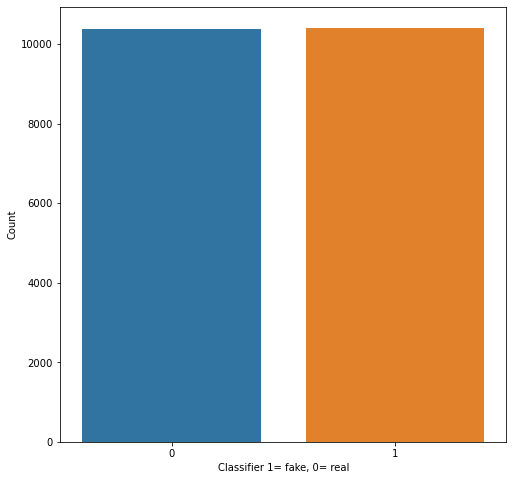

In [23]:
#For the dataset 1
# Visualizing the count of 'Label' column from the dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.countplot(x='label', data=x)
plt.xlabel('Classifier 1= fake, 0= real')
plt.ylabel('Count')
plt.show()

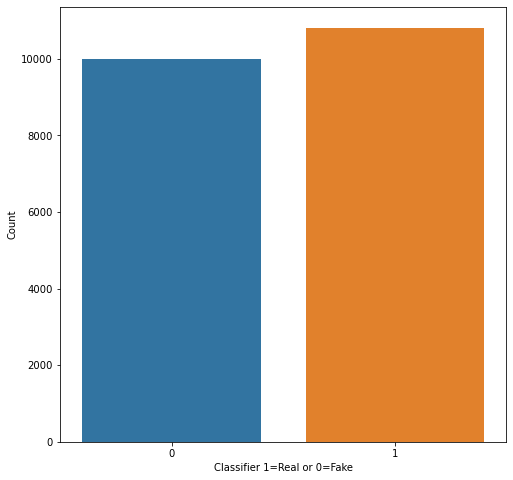

In [24]:
#For the dataset 2
# Visualizing the count of 'Label' column from the dataset
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(x='label', data=y)
plt.xlabel('Classifier 1=Real or 0=Fake')
plt.ylabel('Count')
plt.show()

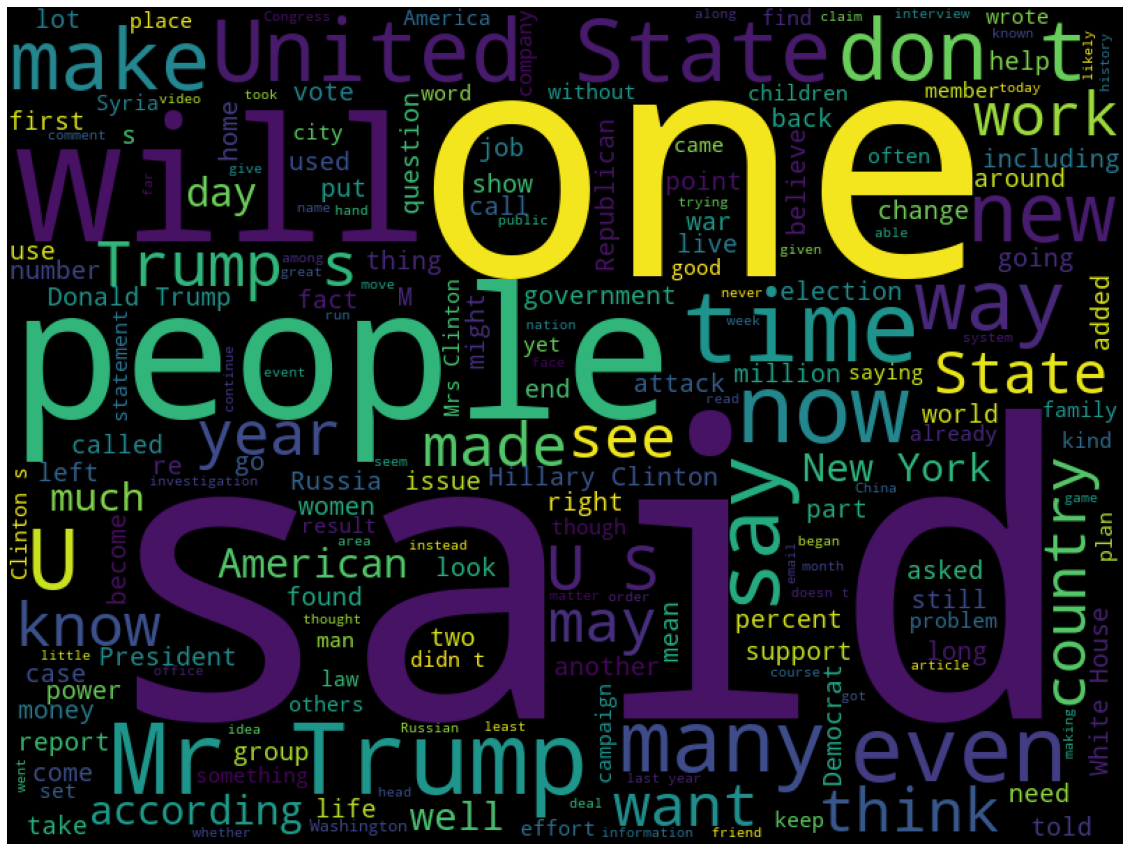

In [25]:
#creating a word cloud for dataset 12
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the news
text_cloud = wordcloud.generate(' '.join(ds1['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

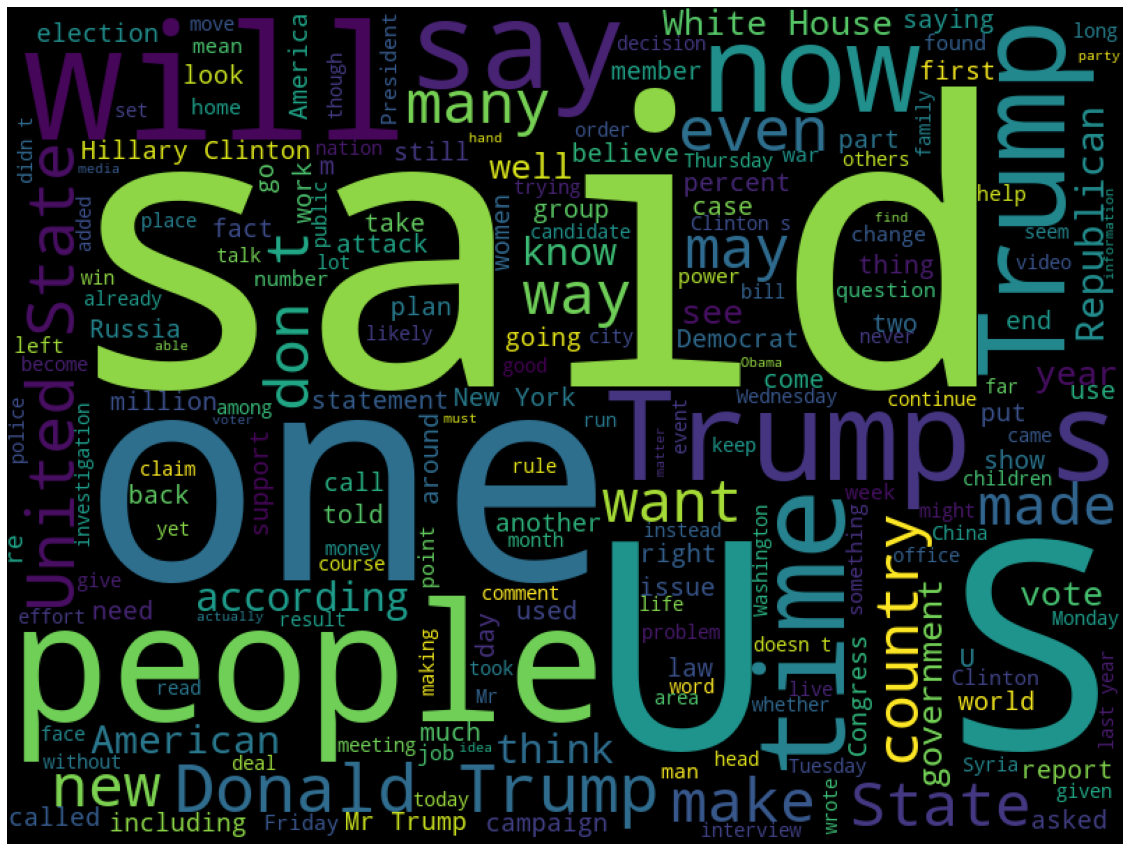

In [26]:
#Creating a word cloud for dataset 2
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the news
text_cloud = wordcloud.generate(' '.join(ds2['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

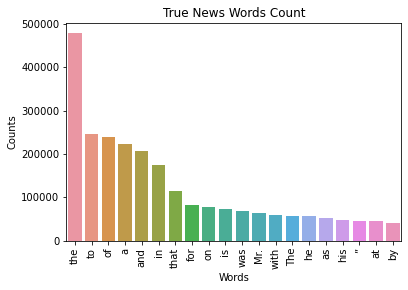

In [27]:
#to find the specific counts of words in fake and real in dataset1
# library for Count Words
from collections import Counter

# create list of True News words
true_news = (ds1[ds1['label'] == 0]['content'].str.cat(sep=" ")).split()

# create DataFrame of that
true_news_df = pd.DataFrame(Counter(true_news).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_df[0],y=true_news_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

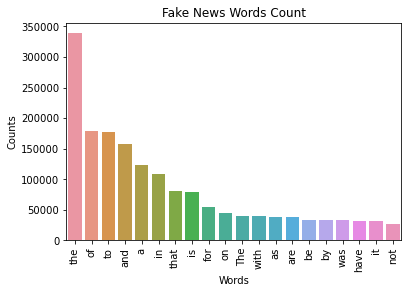

In [29]:
#to find the specific counts of words in fake and real in dataset1
# library for Count Words
from collections import Counter

# create list of True News words
fake_news = (ds1[ds1['label'] == 1]['content'].str.cat(sep=" ")).split()

# create DataFrame of that
fake_news_df = pd.DataFrame(Counter(fake_news).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=fake_news_df[0],y=fake_news_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()

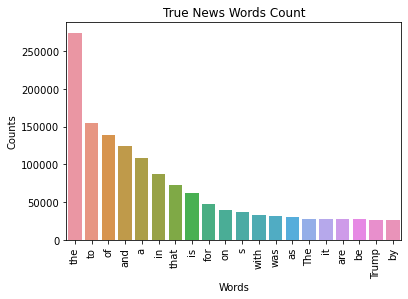

In [30]:
#to find the specific counts of words in fake and real in dataset2
# library for Count Words
from collections import Counter

# create list of True News words
true_news1 = (ds2[ds2['label'] == 1]['content'].str.cat(sep=" ")).split()

# create DataFrame of that
true_news_df1 = pd.DataFrame(Counter(true_news1).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_df1[0],y=true_news_df1[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

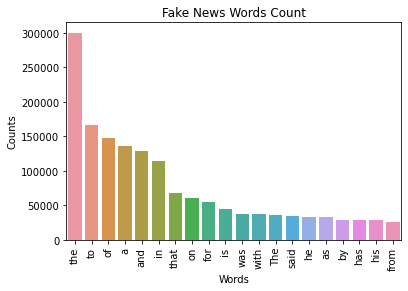

In [31]:
#to find the specific counts of words in fake and real in dataset2
# library for Count Words
from collections import Counter

# create list of True News words
fake_news1 = (ds2[ds2['label'] == 0]['content'].str.cat(sep=" ")).split()

# create DataFrame of that
fake_news_df1 = pd.DataFrame(Counter(fake_news1).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=fake_news_df1[0],y=fake_news_df1[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()

# Stemming and removal of stop words

In [32]:
port_stemmer = PorterStemmer()

In [33]:
# stemming function
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [34]:
# applying stemming function for dataset 1
ds1['content'] = ds1['content'].apply(stemming)

In [37]:
# applying stemming function for dataset 2
ds2['content'] = ds2['content'].apply(stemming)

In [38]:
# viewing content after stemming for dataset1
print(ds1['content'])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2        truth might get fire truth might get fire octo...
3        civilian kill singl us airstrik identifi video...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci rapp...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan nato ...
20799    keep f aliv david swanson author activist jour...
Name: content, Length: 20800, dtype: object


In [39]:
# viewing content after stemming for dataset1
print(ds2['content'])

0        law enforc high alert follow threat cop white ...
1                                post vote hillari alreadi
2        unbeliev obama attorney gener say charlott rio...
3        bobbi jindal rais hindu use stori christian co...
4        satan russia unv imag terrifi new supernuk wes...
                               ...                        
20795    clinton appal effort recoup veteran bonus arna...
20796    photo prove earth seriou danger time worri cha...
20797    trump era censorship may start newsroom new yo...
20798    hillari approv bill clinton ditch secret servi...
20799    u n chief guterr condemn racism xenophobia twi...
Name: content, Length: 20800, dtype: object


In [40]:
#separating data and label to get the values for dataset1

X = ds1['content'].values
Y = ds1['label'].values

In [41]:
print(X)

['hous dem aid even see comey letter jason chaffetz tweet hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know an

In [42]:
Y

array([1, 0, 1, ..., 0, 1, 1])

In [43]:
#separating data and label to get the values for dataset 2

X1 = ds2['content'].values
Y1 = ds2['label'].values

In [44]:
X1

array(['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video comment expect barack obama member fyf fukyoflag blacklivesmatt movement call lynch hang white peopl cop encourag other radio show tuesday night turn tide kill white peopl cop send messag kill black peopl america one f yoflag organ call sunshin radio blog show host texa call sunshin f ing opinion radio show snapshot fyf lolatwhitefear twitter page p show urg support call fyf tonight continu dismantl illus white snapshot twitter radio call invit fyf radio show air p eastern standard time show caller clearli call lynch kill white peopl minut clip radio show heard provid breitbart texa someon would like refer hannib alreadi receiv death threat result interrupt fyf confer call unidentifi black man said mother f ker start f ing like us bunch ni er takin one us roll said caus alreadi roll gang anyway six seven black mother f cker see white person lynch ass let turn tabl conspir cop start lose peopl state

In [45]:
Y1

array([1, 1, 1, ..., 0, 1, 0])

In [46]:
# converting textual data to numerical data by using TFIDF for dataset1

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X_1 = vectorizer.transform(X)

In [47]:
print(X_1)

  (0, 109030)	0.04990609083545967
  (0, 108977)	0.019354676010992878
  (0, 108029)	0.04485544512214073
  (0, 108025)	0.09621662243119276
  (0, 107982)	0.038159282021560374
  (0, 107945)	0.01147813275743077
  (0, 107301)	0.01735255230119808
  (0, 106492)	0.017366145975473413
  (0, 106404)	0.012739399935297378
  (0, 106318)	0.029584577574600923
  (0, 106240)	0.013058991831767156
  (0, 106040)	0.011950783411487302
  (0, 105194)	0.02611855072825209
  (0, 105158)	0.03177277544269941
  (0, 104155)	0.02186410089725434
  (0, 102749)	0.06644108800122836
  (0, 102063)	0.03365344189752555
  (0, 101812)	0.01664554013312925
  (0, 101044)	0.03865106128681813
  (0, 100406)	0.011250984936024663
  (0, 100396)	0.04386167773803338
  (0, 100343)	0.1380903901680028
  (0, 100195)	0.07239396389315284
  (0, 98910)	0.04004998656481277
  (0, 98345)	0.027532903988470952
  :	:
  (20799, 7431)	0.01069212114450089
  (20799, 7107)	0.02831718153331316
  (20799, 6814)	0.04021811963304997
  (20799, 6776)	0.025500790292

In [48]:
# converting textual data to numerical data for dataset 2

vectorizer1 = TfidfVectorizer()
vectorizer1.fit(X1)

X_2= vectorizer1.transform(X1)

In [49]:
print(X_2)

  (0, 86121)	0.025641935484763075
  (0, 86086)	0.02129682195464912
  (0, 85977)	0.12307976540657016
  (0, 85779)	0.04435488533210476
  (0, 84774)	0.019743112280771604
  (0, 84245)	0.03359694658167281
  (0, 84005)	0.023222693922717842
  (0, 83827)	0.14559770674512065
  (0, 83703)	0.02538165423846193
  (0, 83439)	0.014113531833488386
  (0, 83283)	0.02280574392379636
  (0, 83142)	0.013374371088659624
  (0, 83061)	0.05910542156417685
  (0, 82899)	0.03422969111376789
  (0, 82794)	0.054943682758514995
  (0, 81778)	0.03034931823797243
  (0, 81640)	0.0508363071204069
  (0, 80771)	0.03312957095499425
  (0, 80617)	0.04255579145708557
  (0, 80575)	0.02239371431822266
  (0, 80506)	0.029061127787956987
  (0, 80488)	0.032770242893450825
  (0, 79907)	0.03272062178509648
  (0, 79897)	0.03661654124747245
  (0, 79437)	0.04186351267744698
  :	:
  (20799, 68293)	0.17134215882129644
  (20799, 67981)	0.08272754110266796
  (20799, 66988)	0.10111725804632785
  (20799, 66334)	0.0769065594797097
  (20799, 64548

# Data splitting for testing and training

In [50]:
# splitting data to training and testing for dataset1
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y, test_size=0.2, random_state=7)

In [51]:
# splitting data to training and testing for dataset 2
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_2, Y1, test_size=0.2, random_state=7)

In [52]:
X_train.shape

(16640, 110766)

In [53]:
X_test.shape

(4160, 110766)

In [54]:
Y_train.shape

(16640,)

In [55]:
Y_test.shape

(4160,)

In [56]:
print(X1_train.shape)

(16640, 87262)


In [57]:
print(X1_test.shape)

(4160, 87262)


In [58]:
Y1_train.shape

(16640,)

In [59]:
Y1_test.shape

(4160,)

# Logistic regression model on dataset 1

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train, Y_train)

LogisticRegression()

In [62]:
# accuracy score on test data
prediction = model.predict(X_test)
accuracy_test_data = accuracy_score(prediction, Y_test)
print(f"Accuracy score for test data: {accuracy_test_data}")

Accuracy score for test data: 0.9528846153846153


In [63]:
#assigning a function to plot confusion matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization


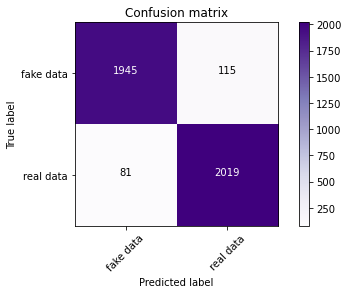

In [64]:
from sklearn import metrics
import itertools
from sklearn.metrics import confusion_matrix
cm1= metrics.confusion_matrix(Y_test,prediction )
plot_confusion_matrix(cm1, classes=['fake data', 'real data'])

In [65]:
print(cm1)

[[1945  115]
 [  81 2019]]


In [66]:
#To get a classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2060
           1       0.95      0.96      0.95      2100

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



# Logistic regression for dataset 2

In [67]:
model_1 = LogisticRegression()

In [68]:
model_1.fit(X1_train, Y1_train)

LogisticRegression()

In [69]:
# accuracy score on test data
prediction_1 = model_1.predict(X1_test)
accuracy_test_data_1 = accuracy_score(prediction_1, Y1_test)
print(f"Accuracy score for test data: {accuracy_test_data_1}")

Accuracy score for test data: 0.9336538461538462


Confusion matrix, without normalization


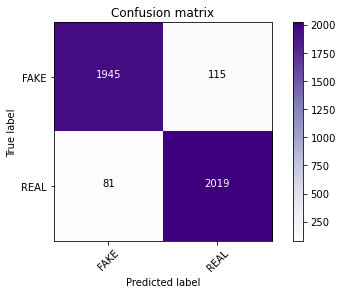

In [70]:
from sklearn import metrics
import itertools
from sklearn.metrics import confusion_matrix
cm_1= metrics.confusion_matrix(Y1_test,prediction_1 )
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [71]:
print(cm_1)

[[1845  159]
 [ 117 2039]]


In [73]:
#To get a classification report
from sklearn.metrics import classification_report
print(classification_report(Y1_test,prediction_1))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2004
           1       0.93      0.95      0.94      2156

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



# Passive Agressive algorithm for dataset 1

In [75]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.956
Confusion matrix, without normalization


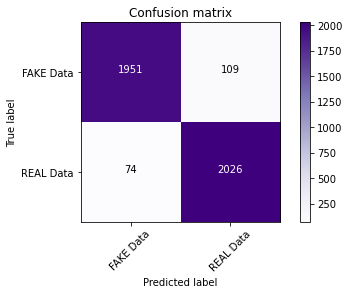

In [76]:
classifier.fit(X_train, Y_train)
prediction_2 = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction_2)
print("accuracy:   %0.3f" % score)
cm_2 = metrics.confusion_matrix(Y_test, prediction_2)
plot_confusion_matrix(cm_2, classes=['FAKE Data', 'REAL Data'])

In [77]:
#To get a classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2060
           1       0.95      0.96      0.96      2100

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



# Passive agressive classifier for dataset 2

In [78]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
classifier_1 = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.944
Confusion matrix, without normalization


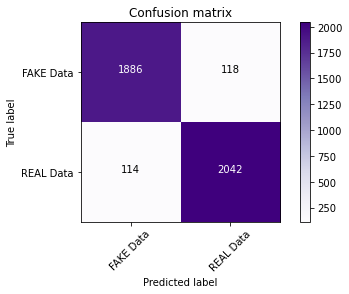

In [80]:
classifier_1.fit(X1_train, Y1_train)
prediction_3 = classifier_1.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction_3)
print("accuracy:   %0.3f" % score)
cm_3 = metrics.confusion_matrix(Y1_test, prediction_3)
plot_confusion_matrix(cm_3, classes=['FAKE Data', 'REAL Data'])

# Multinomial naive bayes for dataset 1

In [82]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier_2=MultinomialNB()

accuracy:   0.861
Confusion matrix, without normalization


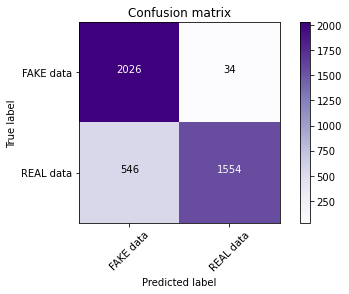

In [86]:
classifier_2.fit(X_train, Y_train)
prediction_4 = classifier_2.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction_4)
print("accuracy:   %0.3f" % score)
cm_4 = metrics.confusion_matrix(Y_test, prediction_4)
plot_confusion_matrix(cm_4, classes=['FAKE data', 'REAL data'])

In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_4))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      2060
           1       0.98      0.74      0.84      2100

    accuracy                           0.86      4160
   macro avg       0.88      0.86      0.86      4160
weighted avg       0.88      0.86      0.86      4160



# Multinomial naive bayes for dataset2

In [88]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier_3=MultinomialNB()

accuracy:   0.865
Confusion matrix, without normalization


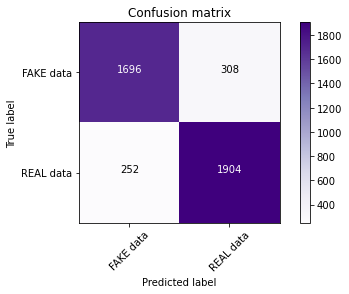

In [89]:
classifier_3.fit(X1_train, Y1_train)
prediction_5 = classifier_3.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction_5)
print("accuracy:   %0.3f" % score)
cm_5 = metrics.confusion_matrix(Y1_test, prediction_5)
plot_confusion_matrix(cm_5, classes=['FAKE data', 'REAL data'])

In [91]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test,prediction_5))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2004
           1       0.86      0.88      0.87      2156

    accuracy                           0.87      4160
   macro avg       0.87      0.86      0.87      4160
weighted avg       0.87      0.87      0.87      4160



# Random forest classifier for dataset 1

In [102]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=100,
                                 random_state=1,
                                 n_jobs=2)

In [103]:
# Fit the model
forest.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [104]:
# Measure model performance
prediction_6 = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(Y_test, prediction_6))

Accuracy: 0.925


Confusion matrix, without normalization


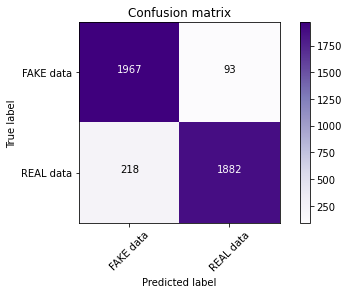

In [105]:
cm_6 = metrics.confusion_matrix(Y_test, prediction_6)
plot_confusion_matrix(cm_6, classes=['FAKE data', 'REAL data'])

In [106]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, prediction_6))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2060
           1       0.95      0.90      0.92      2100

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



# Random forest classifier on dataset 2

In [107]:
from sklearn.ensemble import RandomForestClassifier
forest_1 = RandomForestClassifier(criterion='gini',
                                 n_estimators=100,
                                 random_state=1,
                                 n_jobs=2)

In [108]:
forest_1.fit(X1_train, Y1_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [109]:
# Measure model performance
prediction_7 = forest_1.predict(X1_test)
print('Accuracy: %.3f' % accuracy_score(Y1_test, prediction_7))

Accuracy: 0.913


Confusion matrix, without normalization


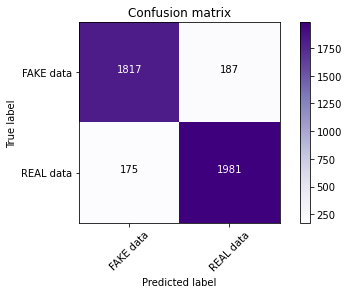

In [110]:
cm_7 = metrics.confusion_matrix(Y1_test, prediction_7)
plot_confusion_matrix(cm_7, classes=['FAKE data', 'REAL data'])

In [112]:
from sklearn.metrics import classification_report

print(classification_report(Y1_test, prediction_7))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2004
           1       0.91      0.92      0.92      2156

    accuracy                           0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160

